# Exploratory Data Analysis

In [64]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statistics import *
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
medal_count = pd.read_excel("dataset//Medals.xlsx")
medal_count

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


# Estimate Of Location

In [4]:
# mean
medal_count.Total.mean()

11.612903225806452

In [6]:
# weighted mean is the same as mean , but except you multiply every value by some (X)i, before adding them up and dividing by the number of instances.
np.average(medal_count.Total,weights=medal_count.Gold)

46.832352941176474

In [10]:
# trimmed mean is calculcated by removing the top and bottom x values from the dataset and then the mean is calculated. It reduces the impact of outliers.
trim_mean(medal_count.Total,0.1) # the second parameter 0.1 determines the number which has to be removed from the top and bottom which is 10% in this case.

6.8933333333333335

In [9]:
# median , the middle value of sorted values.
medal_count.Total.median()

4.0

In [17]:
# Weighted median, multiply every value with some weight (x)i and then pick the middle value such that the sum of values to the left of the median are the same as the sum of values to the rights of the median
def weighted_median(df,median_col,weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count,"Total","Gold")

40

In [20]:
# percentile . the value such that P percent of the data lies below it.
# outlier is the value which is different from most of the data.
q3 = np.percentile(medal_count.Total, 75) # the second parameter here defines the percentile number which we want to calculate
q3

11.0

In [21]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


# Estimates of Variability (Dispersion Metrics)

In [23]:
# deviations, The difference between the observed values and the estimate of location also called errors or residulas.
# variance, The sum of squared deviations from the mean divided by n – 1 where n is the number of data values. mean-squared-error
variance(medal_count.Gold)

49.315100514259

In [26]:
# standard deviation, The square root of the variance.
stdev(medal_count.Gold)

7.022471111671376

In [28]:
# mean absolute deviation, L-1 Norm, Manhattan Norm,The mean of the absolute values of the deviations from the mean.
np.mean(np.abs((medal_count.Gold)- np.mean(medal_count.Gold)))

4.0048560527228565

In [30]:
# median absolute deviation, The median of the absolute values of the deviations from the median.
np.median(np.abs((medal_count.Gold)-np.median(medal_count.Gold)))

1.0

In [31]:
# range, The difference between the largest and the smallest value in a data set.
# order statistics , Metrics based on the data values sorted from smallest to biggest. ranks
# Interquartile range,The difference between the 75th percentile and the 25th percentile.IQR
q3, q1 = np.percentile(medal_count.Gold,[75,25])
iqr = q3-q1
iqr

3.0

### Median absolute deviation is robust against outliers and is calculate by taking the median of the absolute value of all values - the median.

# Explore the Data Distribution

### See Plotly library

<AxesSubplot:>

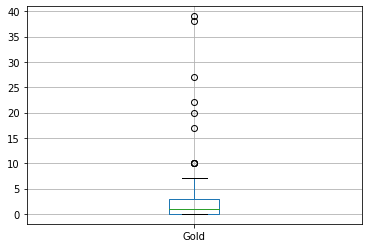

In [32]:
# boxplots, A plot introduced by Tukey as a quick way to visualize the distribution of data.
medal_count.boxplot(column="Gold")

In [36]:
# frequency tables,A tally of the count of numeric data values that fall into a set of intervals (bins).
frequency_table = medal_count.copy()
frequency_table["freq"] = pd.cut(medal_count.Gold,10)
# frequency_table.groupby("freq")["Rank"].count().reset_index()
frequency_table.value_counts()

Rank  Team/NOC                  Gold  Silver  Bronze  Total  Rank by Total  freq         
86    Syrian Arab Republic      0     0       1       1      77             (-0.039, 3.9]    1
34    Chinese Taipei            2     4       6       12     22             (-0.039, 3.9]    1
25    Denmark                   3     4       4       11     23             (-0.039, 3.9]    1
26    Croatia                   3     3       2       8      29             (-0.039, 3.9]    1
27    Islamic Republic of Iran  3     2       2       7      33             (-0.039, 3.9]    1
                                                                                            ..
63    Morocco                   1     0       0       1      77             (-0.039, 3.9]    1
      Puerto Rico               1     0       0       1      77             (-0.039, 3.9]    1
66    Colombia                  0     4       1       5      42             (-0.039, 3.9]    1
67    Azerbaijan                0     3       4       7

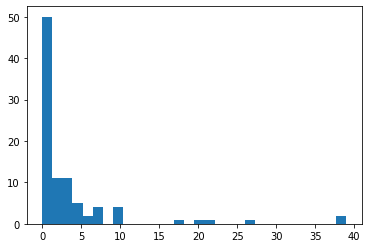

In [41]:
# histogram, A plot of the frequency table with the bins on the x-axis and the count (or pro‐ portion) on the y-axis. While visually similar, bar charts should not be confused with histograms.
# np.histogram(medal_count.Gold,bins="auto")
plt.hist(medal_count.Gold, bins = "auto")
plt.show()

## Statistical Moments

### First Moment is Location (mean) : average of all the data
### Second Moment is Variability : how closely values are spread around the mean
### Third Moment is Skewness : Direction of the tail of the data, discovered through visualization.
### Fourth Moment is Kurtosis : Prepensity for data to have extreme values, discovered through visualization.

<AxesSubplot:ylabel='Density'>

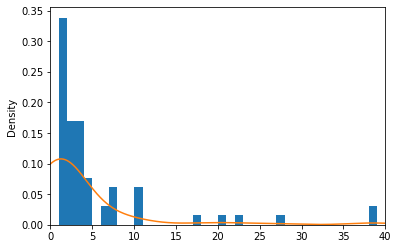

In [49]:
# density plot, A smoothed version of the histogram, often based on a kernel density estimate.

ax = medal_count.Gold.plot.hist(density = True, xlim= [0,40], bins = range(1,40))
medal_count.Gold.plot.density(ax=ax)

# Exploring Binary and Categorical Data

In [50]:
# Mode, The most commonly occurring category or value in a data set.
medal_count.Gold.mode()

0    0
dtype: int64

In [ ]:
# expected values, When the categories can be associated with a numeric value, this gives an average value based on a category’s probability of occurrence.


Text(0, 0.5, 'Gold Medals')

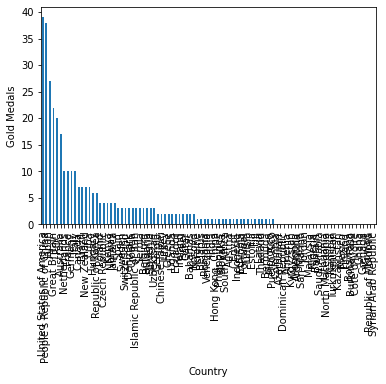

In [52]:
# barplots, The frequency or proportion for each category plotted as bars.
ax = medal_count.plot.bar(x= "Team/NOC",y = "Gold", legend = False)
ax.set_xlabel("Country")
ax.set_ylabel("Gold Medals")

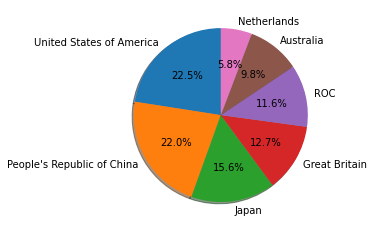

In [59]:
# pie-chart
# medal_count.iloc[:10, :].plot.pie(y = "Gold")
pie_data = medal_count.iloc[:7, :]
plt.pie(pie_data.Gold,labels = pie_data["Team/NOC"],shadow = True,autopct='%1.1f%%', startangle=90)
plt.show()


# Correlation

In [60]:
# correlation coefficient, A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).
# correlation matrix, A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

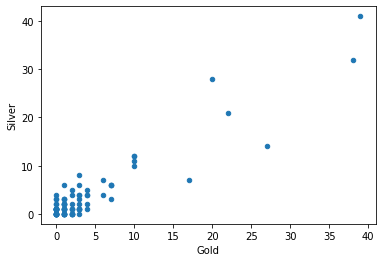

In [61]:
# scatterplot, A plot in which the x-axis is the value of one variable, and the y-axis the value of another.
medal_count.plot.scatter(x = "Gold", y= "Silver")

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

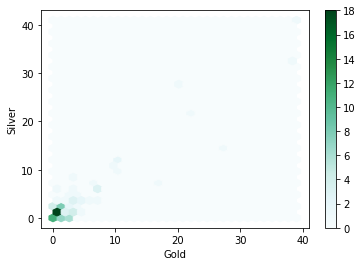

In [63]:
# hexogonal binning, A plot of two numeric variables with the records binned into hexagons.
medal_count.plot.hexbin(x = "Gold", y= "Silver",gridsize=30,sharex = False)

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

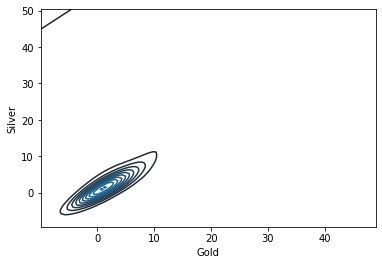

In [77]:
# contour plot, A plot showing the density of two numeric variables like a topographical map.
sns.kdeplot(medal_count["Gold"], medal_count["Silver"])


<AxesSubplot:>

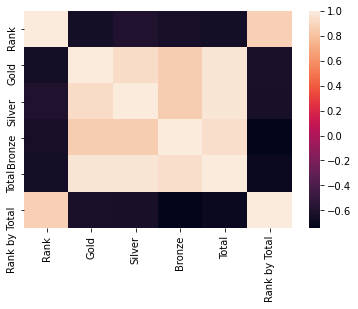

In [73]:
# heatmap
sns.heatmap(medal_count.corr())

In [83]:
# contigency table
cont_table = medal_count[["Silver","Gold"]].pivot_table(index="Silver", columns="Gold", aggfunc= lambda x: len(x), margins=True)
cont_table

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39,All
Silver,,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
1,12.0,6.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,2.0,5.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,2.0,3.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,1.0,NaN,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
5,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,NaN,1.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2
8,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


<AxesSubplot:xlabel='Gold'>

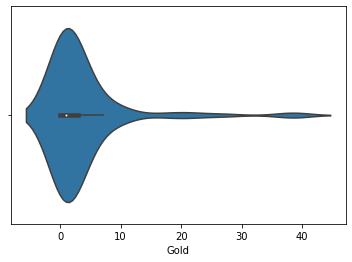

In [87]:
# violin-plot, Similar to a boxplot but showing the density estimate.
sns.violinplot(x = medal_count["Gold"])